<a href="https://colab.research.google.com/github/SowmyaMadala/Drowsiness-Detetction-TL-/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 1: Data Collection and Preprocessing using Image Data Generator**

In [ ]:
#Installing required modules and packages
import os
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from tensorflow.keras.layers import Dropout

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2

import numpy as np

In [ ]:
train_dir='/content/drive/MyDrive/ Drowsiness Detection/ Dataset/Sample/ Train'
validation_dir='/content/drive/MyDrive/ Drowsiness Detection/ Dataset/Sample/Test'

In [ ]:
# Directory with our training Yawning pictures
train_yawning_dir = os.path.join(train_dir, 'Yawn')
# Directory with our training Normal pictures
train_noyawning_dir = os.path.join(train_dir, 'NoYawn')

In [ ]:
# Directory with our validation Yawning pictures
validation_yawning_dir = os.path.join(validation_dir, 'Yawn')
# Directory with our validation Normal pictures
validation_noyawning_dir = os.path.join(validation_dir, 'NoYawn')

In [ ]:
train_yawning_fnames = os.listdir( train_yawning_dir )
train_noyawning_fnames = os.listdir( train_noyawning_dir )

In [ ]:
labels = ['NoYawn', 'Yawn']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data(train_dir)
val = get_data(validation_dir)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


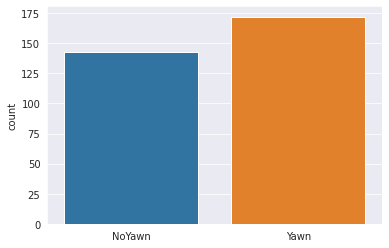

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("NoYawn")
    else:
        l.append("Yawn")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'NoYawn')

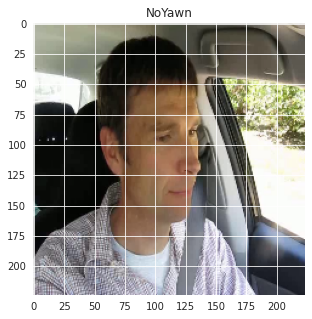

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Yawn')

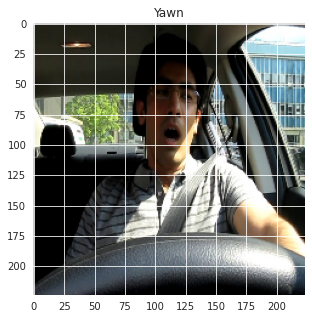

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

# **Module 2: Testing Pre-trained Models VGG16,ResNet50,InceptionV3**

VGG16

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 32, class_mode = 'binary', target_size = (224, 224))
# Flow validation images in batches of 32 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 32, class_mode = 'binary', target_size = (224, 224))

Found 315 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

vggmodel = tf.keras.models.Model(base_model.input, x)

vggmodel.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#vggmodel.summary()

In [ ]:
vgghist = vggmodel.fit(train_generator, validation_data = validation_generator, epochs = 10)

Epoch 1/10
10/10 [==============================] - 7s 716ms/step - loss: 0.4343 - acc: 0.7937 - val_loss: 0.7339 - val_acc: 0.6000
Epoch 2/10
10/10 [==============================] - 7s 697ms/step - loss: 0.4241 - acc: 0.7905 - val_loss: 0.8501 - val_acc: 0.6000
Epoch 3/10
10/10 [==============================] - 7s 699ms/step - loss: 0.4156 - acc: 0.7810 - val_loss: 0.5802 - val_acc: 0.6889
Epoch 4/10
10/10 [==============================] - 7s 693ms/step - loss: 0.4815 - acc: 0.7397 - val_loss: 1.0468 - val_acc: 0.6222
Epoch 5/10
10/10 [==============================] - 7s 692ms/step - loss: 0.4155 - acc: 0.8000 - val_loss: 0.5400 - val_acc: 0.7111
Epoch 6/10
10/10 [==============================] - 7s 694ms/step - loss: 0.3882 - acc: 0.8063 - val_loss: 1.1899 - val_acc: 0.6222
Epoch 7/10
10/10 [==============================] - 7s 695ms/step - loss: 0.4925 - acc: 0.7619 - val_loss: 0.5473 - val_acc: 0.7556
Epoch 8/10
10/10 [==============================] - 7s 709ms/step - loss: 0.

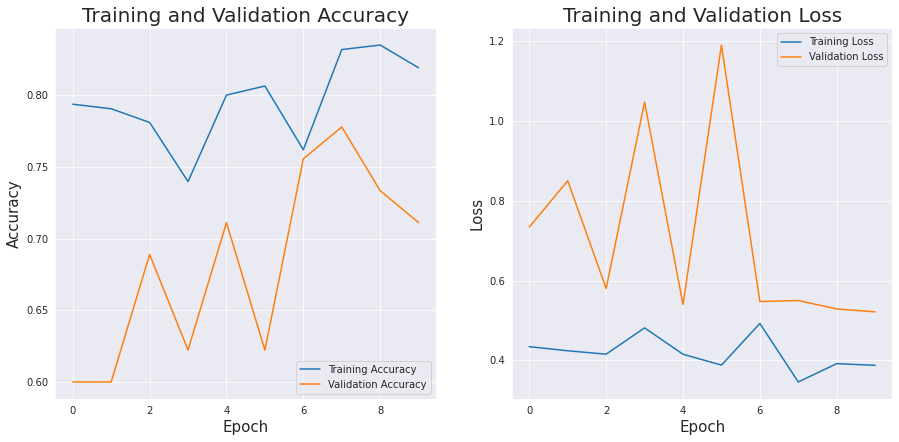

In [ ]:
acc = vgghist.history['acc']
val_acc = vgghist.history['val_acc']
loss = vgghist.history['loss']
val_loss = vgghist.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss',fontsize=20)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.show()

InceptionV3

Data Augmention for Matching InceptionV3 Input Data

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 315 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

inceptionmodel = tf.keras.models.Model(base_model.input, x)

inceptionmodel.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#inceptionmodel.summary()

In [ ]:
inc_history = inceptionmodel.fit_generator(train_generator, validation_data = validation_generator, epochs = 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
16/16 [==============================] - 14s 492ms/step - loss: 4.6675 - acc: 0.5651 - val_loss: 2.6963 - val_acc: 0.5556
Epoch 2/10
16/16 [==============================] - 5s 296ms/step - loss: 0.9195 - acc: 0.7175 - val_loss: 1.8971 - val_acc: 0.5333
Epoch 3/10
16/16 [==============================] - 5s 291ms/step - loss: 0.7315 - acc: 0.7556 - val_loss: 1.4959 - val_acc: 0.5556
Epoch 4/10
16/16 [==============================] - 5s 294ms/step - loss: 0.8167 - acc: 0.7492 - val_loss: 2.2349 - val_acc: 0.5556
Epoch 5/10
16/16 [==============================] - 5s 295ms/step - loss: 0.8898 - acc: 0.7048 - val_loss: 1.0268 - val_acc: 0.6000
Epoch 6/10
16/16 [==============================] - 5s 292ms/step - loss: 0.6288 - acc: 0.7619 - val_loss: 0.7546 - val_acc: 0.6667
Epoch 7/10
16/16 [==============================] - 5s 295ms/step - loss: 0.6674 - acc: 0.7619 - val_loss: 0.7650 - val_acc: 0.6444
Epoch 8/10
16/16 [==============================] - 5s 295ms/step - loss: 0

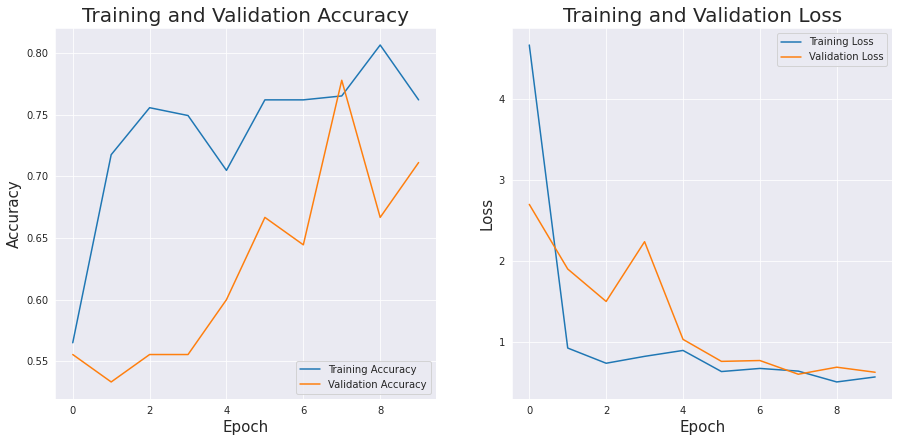

In [ ]:
acc = inc_history.history['acc']
val_acc = inc_history.history['val_acc']
loss = inc_history.history['loss']
val_loss = inc_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss',fontsize=20)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.show()

ResNet50

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 315 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50

resmodel = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resmodel.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

resmodel = Sequential()
resmodel.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
resmodel.add(Dense(1, activation='sigmoid'))

In [ ]:
resmodel.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#resmodel.summary()

In [ ]:
resnet_history = resmodel.fit(train_generator, validation_data = validation_generator, epochs = 10)

Epoch 1/10
16/16 [==============================] - 21s 795ms/step - loss: 1.3161 - acc: 0.6762 - val_loss: 1.6060 - val_acc: 0.4667
Epoch 2/10
16/16 [==============================] - 10s 580ms/step - loss: 1.3785 - acc: 0.6698 - val_loss: 1.3328 - val_acc: 0.4667
Epoch 3/10
16/16 [==============================] - 10s 581ms/step - loss: 1.0769 - acc: 0.7016 - val_loss: 1.0130 - val_acc: 0.4444
Epoch 4/10
16/16 [==============================] - 10s 583ms/step - loss: 1.0287 - acc: 0.7143 - val_loss: 0.8929 - val_acc: 0.4667
Epoch 5/10
16/16 [==============================] - 10s 579ms/step - loss: 1.0202 - acc: 0.7397 - val_loss: 0.6605 - val_acc: 0.6222
Epoch 6/10
16/16 [==============================] - 9s 571ms/step - loss: 0.7473 - acc: 0.7778 - val_loss: 0.6091 - val_acc: 0.6000
Epoch 7/10
16/16 [==============================] - 9s 575ms/step - loss: 0.8036 - acc: 0.7683 - val_loss: 0.5894 - val_acc: 0.7333
Epoch 8/10
16/16 [==============================] - 9s 573ms/step - los

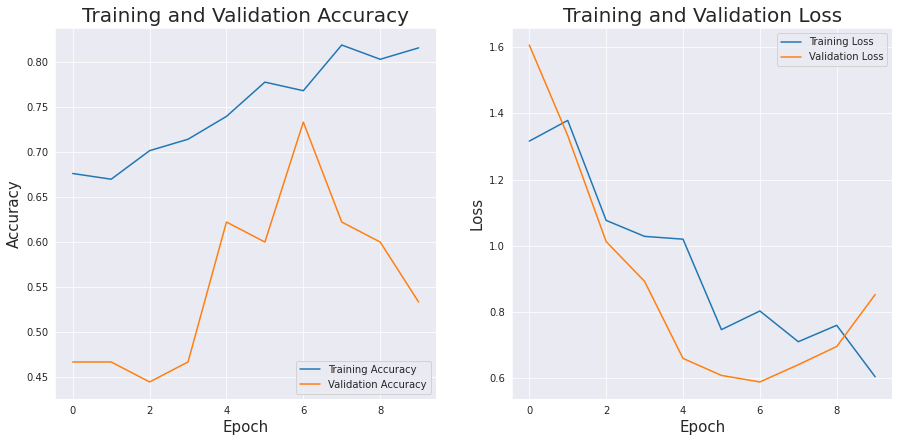

In [ ]:
acc = resnet_history.history['acc']
val_acc = resnet_history.history['val_acc']
loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss',fontsize=20)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.show()

# **Module 3: Model Development using CNN**

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

#model.summary()

In [ ]:
opt = Adam(learning_rate=0.01)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
image_history = model.fit(x_train,y_train,epochs = 20 , validation_data = (x_val, y_val))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


10/10 [==============================] - 41s 3s/step - loss: 9.7981 - accuracy: 0.5437 - val_loss: 2.2805 - val_accuracy: 0.4667
Epoch 2/20
10/10 [==============================] - 24s 2s/step - loss: 0.9691 - accuracy: 0.5527 - val_loss: 0.6909 - val_accuracy: 0.5333
Epoch 3/20
10/10 [==============================] - 24s 2s/step - loss: 0.6901 - accuracy: 0.5409 - val_loss: 0.6924 - val_accuracy: 0.5333
Epoch 4/20
10/10 [==============================] - 24s 2s/step - loss: 0.6815 - accuracy: 0.5861 - val_loss: 0.6905 - val_accuracy: 0.5333
Epoch 5/20
10/10 [==============================] - 24s 2s/step - loss: 1.1074 - accuracy: 0.5590 - val_loss: 0.8590 - val_accuracy: 0.5333
Epoch 6/20
10/10 [==============================] - 24s 2s/step - loss: 0.7975 - accuracy: 0.5317 - val_loss: 0.6730 - val_accuracy: 0.5333
Epoch 7/20
10/10 [==============================] - 24s 2s/step - loss: 0.5965 - accuracy: 0.6082 - val_loss: 0.6830 - val_accuracy: 0.5778
Epoch 8/20
10/10 [=============

In [ ]:
model.save('yawningmodel.h5')

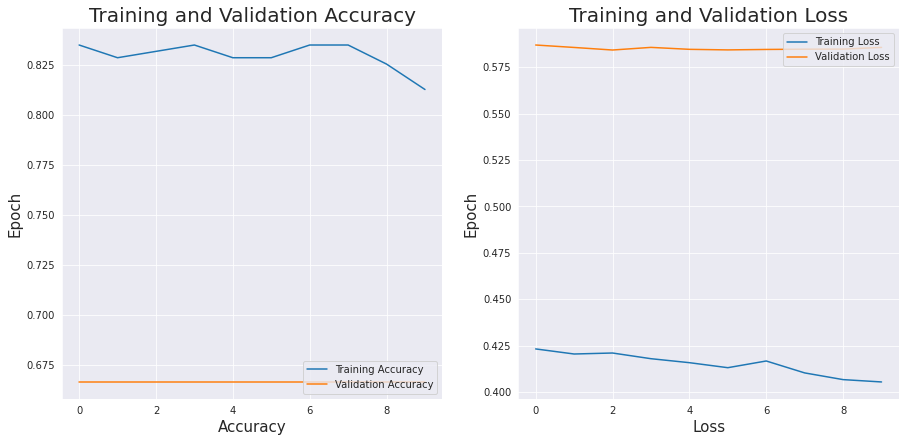

In [ ]:
acc = image_history.history['accuracy']
val_acc = image_history.history['val_accuracy']
loss = image_history.history['loss']
val_loss = image_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontsize=20)
plt.xlabel('Accuracy', fontsize=15)
plt.ylabel('Epoch', fontsize=15)

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss',fontsize=20)
plt.xlabel('Loss', fontsize=15)
plt.ylabel('Epoch', fontsize=15)
plt.show()

In [ ]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['NoYawn (Class 0)','Yawn (Class 1)']))

                  precision    recall  f1-score   support

NoYawn (Class 0)       0.60      0.86      0.71        21
  Yawn (Class 1)       0.80      0.50      0.62        24

        accuracy                           0.67        45
       macro avg       0.70      0.68      0.66        45
    weighted avg       0.71      0.67      0.66        45



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**Applying Transfer Learning**

In [ ]:
from keras.applications.vgg16 import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')
#pretrained_model.summary()

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create a new generator
imagegen = ImageDataGenerator()
# load train data
train = imagegen.flow_from_directory(train_dir, class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))
# load val data
val = imagegen.flow_from_directory(validation_dir, class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))

Found 315 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [ ]:
vgg_features_train = pretrained_model.predict(train)
vgg_features_val = pretrained_model.predict(val)

In [ ]:
import keras
import keras.utils
from keras.utils.np_utils import to_categorical
# OHE target column
train_target = to_categorical(train.labels)
val_target =  to_categorical(val.labels)

In [ ]:
train_labels=np.argmax(train_target, axis=1)
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
val_labels=np.argmax(val_target, axis=1)
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
from keras.layers import BatchNormalization
model2 = Sequential()
model2.add(Flatten(input_shape=(7,7,512)))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(2, activation='softmax'))

# compile the model
model2.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

#model2.summary()

In [ ]:
# train model using features generated from VGG16 model
history=model2.fit(vgg_features_train, train_target, epochs=10, batch_size=128, validation_data=(vgg_features_val, val_target))

Epoch 1/10
3/3 [==============================] - 4s 184ms/step - loss: 0.6993 - accuracy: 0.6798 - val_loss: 7.8626 - val_accuracy: 0.6222
Epoch 2/10
3/3 [==============================] - 0s 45ms/step - loss: 0.3422 - accuracy: 0.8526 - val_loss: 3.6566 - val_accuracy: 0.6444
Epoch 3/10
3/3 [==============================] - 0s 50ms/step - loss: 0.2838 - accuracy: 0.9003 - val_loss: 2.3670 - val_accuracy: 0.6667
Epoch 4/10
3/3 [==============================] - 0s 45ms/step - loss: 0.2277 - accuracy: 0.9189 - val_loss: 1.8315 - val_accuracy: 0.6889
Epoch 5/10
3/3 [==============================] - 0s 49ms/step - loss: 0.2029 - accuracy: 0.9509 - val_loss: 1.6203 - val_accuracy: 0.7111
Epoch 6/10
3/3 [==============================] - 0s 44ms/step - loss: 0.1960 - accuracy: 0.9408 - val_loss: 1.4963 - val_accuracy: 0.7111
Epoch 7/10
3/3 [==============================] - 0s 45ms/step - loss: 0.1601 - accuracy: 0.9453 - val_loss: 1.4187 - val_accuracy: 0.7111
Epoch 8/10
3/3 [==========

In [ ]:
model2.save('Transferlearningmodel.h5')

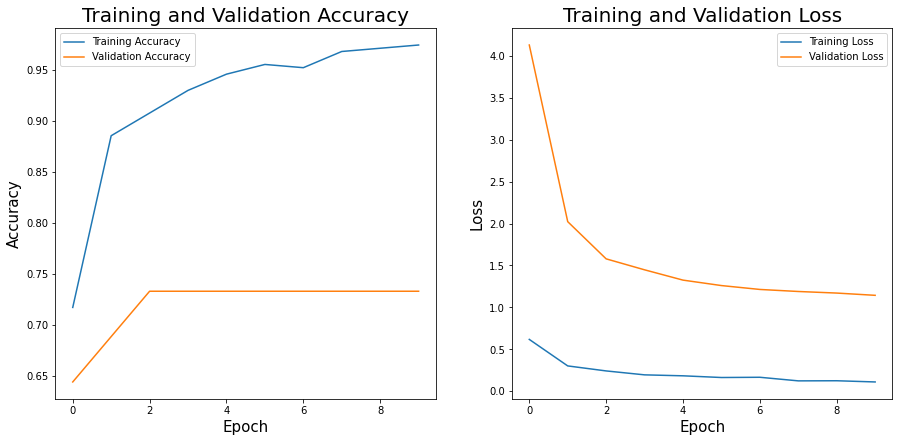

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy',fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss',fontsize=20)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.show()

In [ ]:
train_y_pred=model2.predict(vgg_features_train)
train_y_pred = np.argmax(train_y_pred, axis=1)
train_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_pred=model2.predict(vgg_features_val)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1])

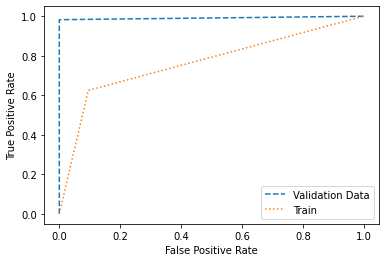

Accuracy from ROC curve for train data: 0.9912790697674418
Accuracy from ROC curve: 0.7648809523809524


In [ ]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
val_fpr, val_tpr, threshold = roc_curve(val_labels, y_pred)
train_fpr, train_tpr, threshold = roc_curve(train_labels, train_y_pred)
auc = roc_auc_score(val_labels, y_pred)
train_auc = roc_auc_score(train_labels, train_y_pred)
pyplot.plot(train_fpr, train_tpr, linestyle='--',label='Validation Data')
pyplot.plot(val_fpr, val_tpr, linestyle=':',label='Train')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.savefig('ROC Curve.png')
pyplot.show()
print('Accuracy from ROC curve for train data: {0}'.format(train_auc))
print('Accuracy from ROC curve: {0}'.format(auc))

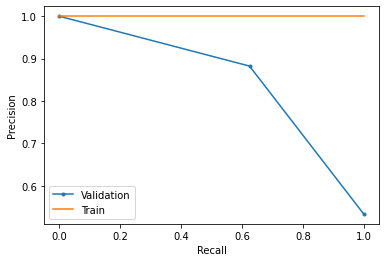

CNN: f1=1.000 auc=1.000
CNN: f1=0.732 auc=0.854


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
val_lr_precision, val_lr_recall, _ = precision_recall_curve(val_labels, y_pred)
val_lr_f1, val_lr_auc = f1_score(val_labels, y_pred), auc(val_lr_recall, val_lr_precision)
train_lr_precision, train_lr_recall, _ = precision_recall_curve(train_labels, train_y_pred)
train_lr_f1, train_lr_auc = f1_score(train_labels, train_y_pred), auc(train_lr_recall, train_lr_precision)
pyplot.plot(val_lr_recall, val_lr_precision, marker='.',label='Validation')
pyplot.plot(train_lr_recall, train_lr_precision,label='Train')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the plot
pyplot.legend()
pyplot.savefig('AUC Curve.png')
pyplot.show()
print('CNN: f1=%.3f auc=%.3f' % (train_lr_f1, train_lr_auc))
print('CNN: f1=%.3f auc=%.3f' % (val_lr_f1, val_lr_auc))

# **Module 4: Model Integration using OpenCV**

In [ ]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
from  keras.models import load_model
import cv2
from pygame import mixer
import time

#sound file loading
mixer.init()
sound = mixer.Sound('alarm.wav')

#Read Facial chracters for identifying the eye features
face = cv2.CascadeClassifier('haar cascade files\haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('haar cascade files\haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier('haar cascade files\haarcascade_righteye_2splits.xml')
#Eyes ope or closed
lbl=['Close','Open']

#Loading Eye Pattern Recognization Model
eyemodel = load_model('models/cnncat2.h5')

#Read the current working directory path
path = os.getcwd()

#Intializing variables for obtaining the score of eye closure
eye_close_count=0
eye_close_score=0
thicc=2
rpred=[99]
lpred=[99]
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
yawnmodel = load_model('content/keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

cap = cv2.VideoCapture(0)
yawn_score=0

while(True):
    
    ret,frame= cap.read()
    height,width = frame.shape[:2] 
    #Code for obtaining the eye_closure_score
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    left_eye = leye.detectMultiScale(gray)
    right_eye =  reye.detectMultiScale(gray)
    #Region of interest
    cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED )
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (100,100,100) , 1 )
    #Checking the right eye pattern
    for (x,y,w,h) in right_eye:
        r_eye=frame[y:y+h,x:x+w]
        eye_close_count=eye_close_count+1
        r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
        r_eye = cv2.resize(r_eye,(24,24))
        r_eye= r_eye/255
        r_eye=  r_eye.reshape(24,24,-1)
        r_eye = np.expand_dims(r_eye,axis=0)
        rpred = eyemodel.predict_classes(r_eye)
        if(rpred[0]==1):
            lbl='Open' 
        if(rpred[0]==0):
            lbl='Closed'
        break
    #Checking the left eye pattern
    for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
        eye_close_count=eye_close_count+1
        l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2GRAY)  
        l_eye = cv2.resize(l_eye,(24,24))
        l_eye= l_eye/255
        l_eye=l_eye.reshape(24,24,-1)
        l_eye = np.expand_dims(l_eye,axis=0)
        lpred = eyemodel.predict_classes(l_eye)
        if(lpred[0]==1):
            lbl='Open'   
        if(lpred[0]==0):
            lbl='Closed'
        break
    #Incerementing score based on both eye patterns
    if(rpred[0]==0 and lpred[0]==0):
        eye_close_score=eye_close_score+1
        #cv2.putText(frame,"Eye_Closed",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    else:
        eye_close_score=eye_close_score-1
        #cv2.putText(frame,"Eye_Open",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)


    #Yawning Analysis

    #resize the image to a 224x224 with the same strategy as in TM2:
    #resizing the image to be at least 224x224 and then cropping from the center
    frame= cv2.resize(frame,(224,224))
    
    #turn the image into a numpy array
    image_array = np.asarray(frame)

    
    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

    # Load the image into the array
    data[0] = normalized_image_array

    # run the inference
    prediction = yawnmodel.predict(data)
    prediction=np.argmax(prediction, axis=1)
    print(prediction)
    if prediction == 1:
        yawn_score=yawn_score+1
        #cv2.putText(frame,"Yawning",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)     #Adjust this according to the frame while running
    else:
        yawn_score=yawn_score-1
        #cv2.putText(frame,"Not Yawning",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)   #Adjust this according to the frame while running
    if (yawn_score<0 or eye_clsoe_score<0):
        yawn_score=0   
        eye_score=0
        #cv2.putText(frame,'YawnScore:'+str(yawn_score)+'EyeScore'+str(eye_score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if yawn_score>15 or eye_close_score>15:
        try:
            sound.play()
            cv2.putText(frame, "Subject is felling drowsy", (20,20), 
                        cv2.FONT_HERSHEY_COMPLEX_SMALL, 1,(0,0,255),2)
        except:  # isplaying = False
            pass
        if(thicc<16):
            thicc= thicc+2
        else:
            thicc=thicc-2
            if(thicc<2):
                thicc=2
        cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
        #cv2.putText(frame, "Subject is felling drowsy", (20,20), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1,(0,0,255),2)
        cv2.putText(frame,'YawnScore:'+str(yawn_score)+'EyeScore'+str(eye_score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
        
    cv2.imshow('frame', frame )
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Results and Analysis

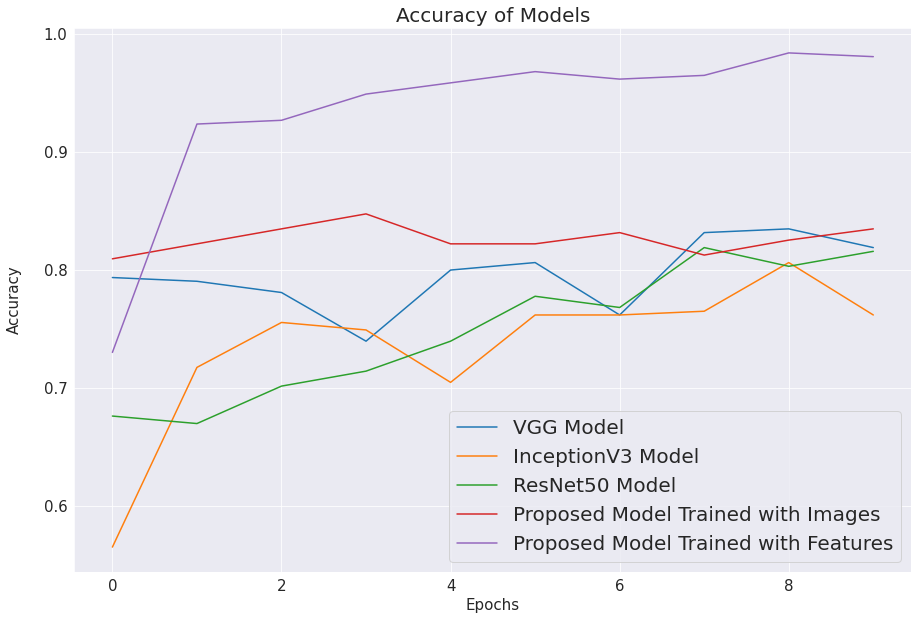

In [ ]:
from google.colab import files
acc = history.history['accuracy']
vgg_acc = vgghist.history['acc']
res_acc = resnet_history.history['acc']
inc_acc = inc_history.history['acc']
m1_acc=image_history.history['accuracy']
epochs_range = range(10)

plt.figure(figsize=(15, 10))
plt.plot(epochs_range, vgg_acc, label='VGG Model')
plt.plot(epochs_range, inc_acc, label='InceptionV3 Model')
plt.plot(epochs_range, res_acc, label='ResNet50 Model')
plt.plot(epochs_range, m1_acc, label='Proposed Model Trained with Images')
plt.plot(epochs_range, acc, label='Proposed Model Trained with Features')
plt.legend(loc='best', prop={"size":20})
plt.title('Accuracy of Models',fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy\n', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig("AccuracyGraph.png")
plt.show()

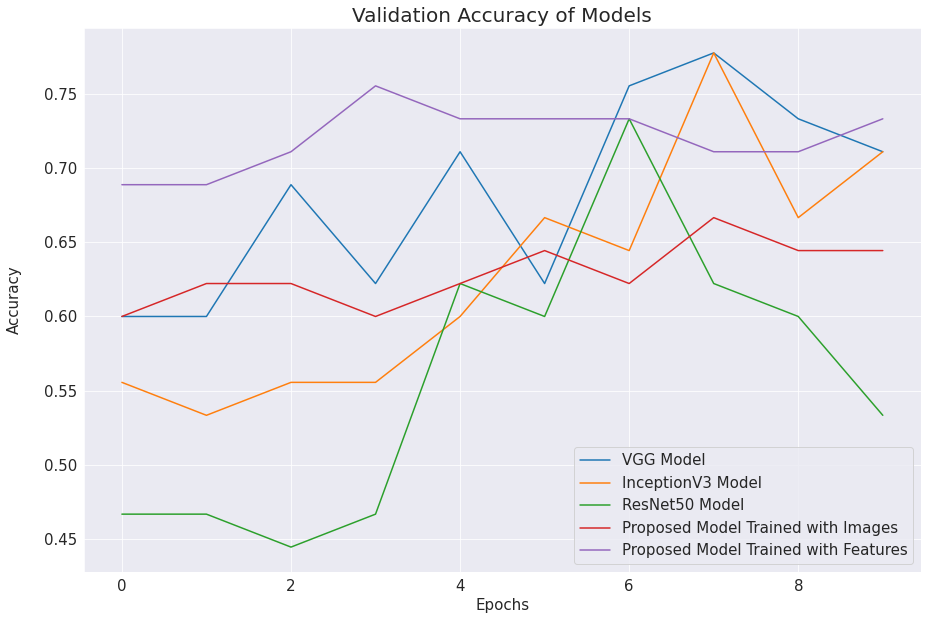

In [ ]:
acc = history.history['val_accuracy']
vgg_acc = vgghist.history['val_acc']
res_acc = resnet_history.history['val_acc']
inc_acc = inc_history.history['val_acc']
m1_acc=image_history.history['val_accuracy']
epochs_range = range(10)

plt.figure(figsize=(15, 10))
plt.plot(epochs_range, vgg_acc, label='VGG Model')
plt.plot(epochs_range, inc_acc, label='InceptionV3 Model')
plt.plot(epochs_range, res_acc, label='ResNet50 Model')
plt.plot(epochs_range, m1_acc, label='Proposed Model Trained with Images')
plt.plot(epochs_range, acc, label='Proposed Model Trained with Features')
plt.legend(loc='best', prop={"size":15})
plt.title('Validation Accuracy of Models',fontsize=20)
plt.ylabel('Accuracy\n', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig("ValidationAccuracyGraph.png")
plt.show()

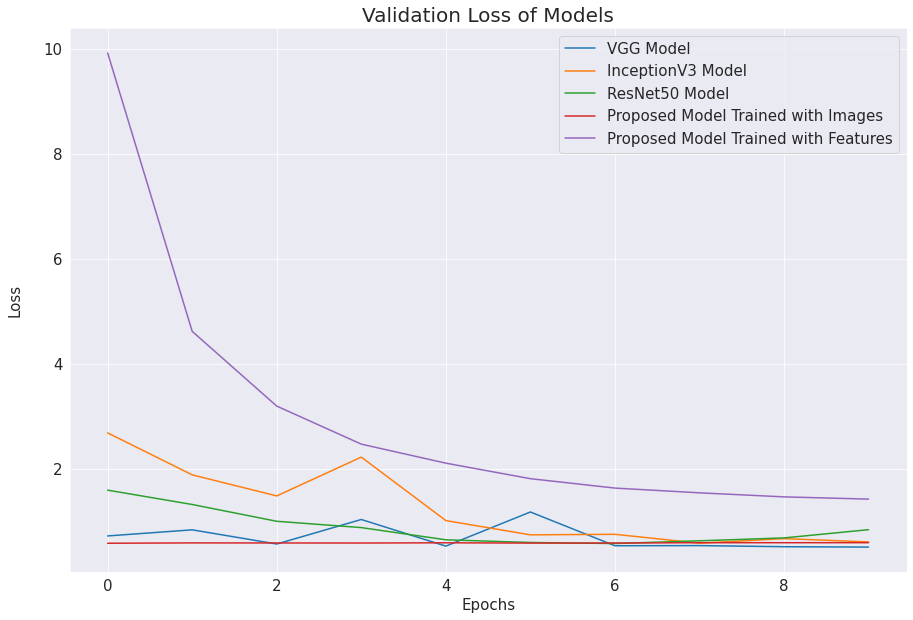

In [ ]:
acc = history.history['val_loss']
vgg_acc = vgghist.history['val_loss']
res_acc = resnet_history.history['val_loss']
inc_acc = inc_history.history['val_loss']
m1_acc=image_history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(15, 10))
plt.plot(epochs_range, vgg_acc, label='VGG Model')
plt.plot(epochs_range, inc_acc, label='InceptionV3 Model')
plt.plot(epochs_range, res_acc, label='ResNet50 Model')
plt.plot(epochs_range, m1_acc, label='Proposed Model Trained with Images')
plt.plot(epochs_range, acc, label='Proposed Model Trained with Features')
plt.legend(loc='best', prop={"size":15})
plt.title('Validation Loss of Models',fontsize=20)
plt.ylabel('Loss\n', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig("ValidationLossGraph.png")
plt.show()

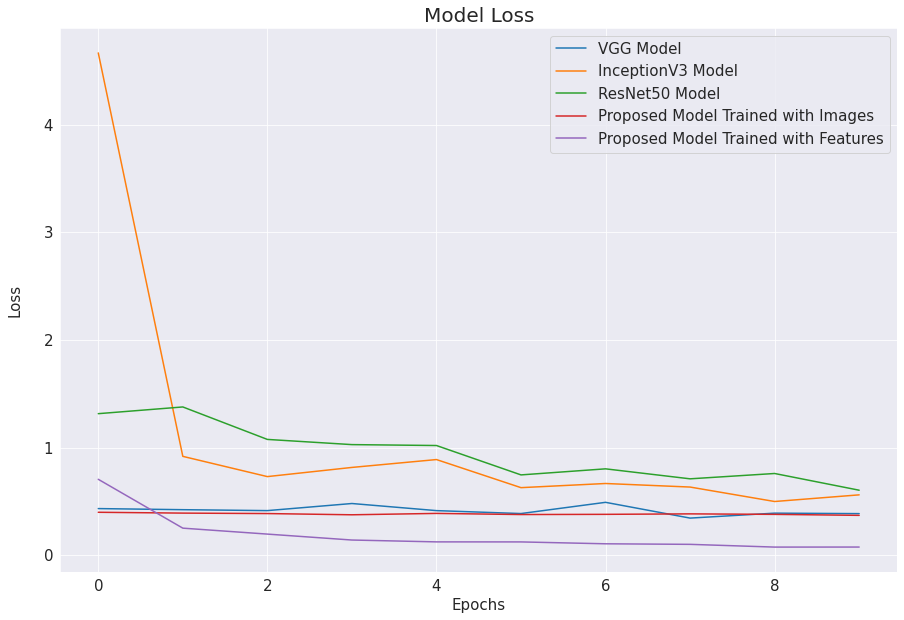

In [ ]:
acc = history.history['loss']
vgg_acc = vgghist.history['loss']
res_acc = resnet_history.history['loss']
inc_acc = inc_history.history['loss']
m1_acc=image_history.history['loss']
epochs_range = range(10)

plt.figure(figsize=(15, 10))
plt.plot(epochs_range, vgg_acc, label='VGG Model')
plt.plot(epochs_range, inc_acc, label='InceptionV3 Model')
plt.plot(epochs_range, res_acc, label='ResNet50 Model')
plt.plot(epochs_range, m1_acc, label='Proposed Model Trained with Images')
plt.plot(epochs_range, acc, label='Proposed Model Trained with Features')
plt.legend(loc='best', prop={"size":15})
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss\n', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig("LossGraph.png")
plt.show()

Comparision of our model with existing works

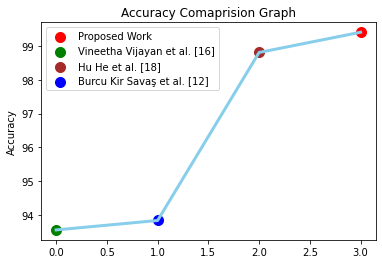

In [ ]:
import matplotlib.pyplot as plt
l=[93.55,93.83,98.81,99.41]
tick_label = ['Burcu Kir Savaş et al. [12]','Vineetha Vijayan et al. [16]','Hu He et al. [18]','Proposed Work']
plt.title('Accuracy Comaprision Graph')
plt.plot(l, color='skyblue',linewidth=3)
p1=plt.scatter(3,l[3], s = 100, c = 'red', marker='o')
p2=plt.scatter(0,l[0], s = 100, c = 'green', marker='o')
p3=plt.scatter(2,l[2], s = 100, c = 'brown', marker='o')
p4=plt.scatter(1,l[1], s = 100, c = 'blue', marker='o')
plt.legend((p1,p2,p3,p4),
           ('Proposed Work', 'Vineetha Vijayan et al. [16]', 'Hu He et al. [18]','Burcu Kir Savaş et al. [12]'),
           scatterpoints=1,fontsize=10,loc='best')
plt.ylabel('Accuracy')
plt.savefig('Papergraph')

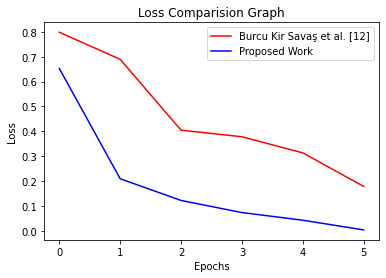

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
l1=[0.7983,0.6895,0.4048,0.3782,0.3135,0.1786]
l2=[0.6528,0.2095,0.1222,0.0736,0.0428,0.0038]
plt.title('Loss Comparision Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(l1,c='red',label='Burcu Kir Savaş et al. [12]')
plt.plot(l2,c='blue',label='Proposed Work')
plt.legend()
plt.show()

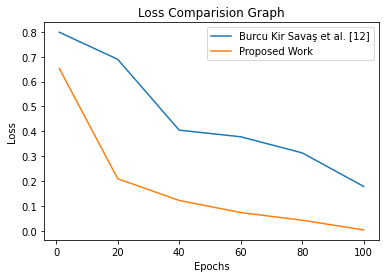

In [ ]:
import matplotlib.pyplot as plt
  
# line 1 poin,ts
x1 = [1,20,40,60,80,100]
y1 = [0.7983,0.6895,0.4048,0.3782,0.3135,0.1786]
# plotting the line 1 points 
plt.plot(x1, y1, label = "Burcu Kir Savaş et al. [12]")
  
# line 2 points
x2 = [1,20,40,60,80,100]
y2 = [0.6528,0.2095,0.1222,0.0736,0.0428,0.0038]
# plotting the line 2 points 
plt.plot(x2, y2, label = "Proposed Work")
  
# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Loss')
# giving a title to my graph
plt.title('Loss Comparision Graph')
  
# show a legend on the plot
plt.legend()
plt.savefig('PaperLossGraph')